In [41]:
# core libraries
import pandas as pd
import numpy as np
import math
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier

# pre-processing
from sklearn.model_selection import train_test_split

# models
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR
# import xgboost as xgb
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsRegressor

# metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# hyper-parameter tuning
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neural_network import MLPRegressor

# <span style="color:orange"> Preprocessing

In [9]:
df = pd.read_csv("pregnancy_data.csv")

<AxesSubplot:>

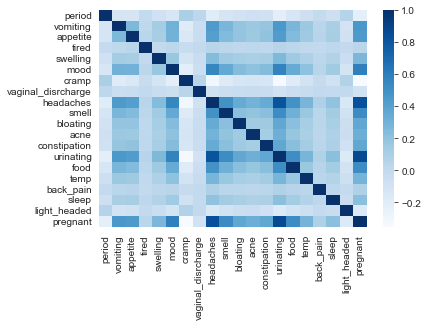

In [10]:
corr = df.corr()
sns.heatmap(corr, cmap="Blues")

In [11]:
df.columns

Index(['period', 'vomiting', 'appetite', 'tired', 'swelling', 'mood', 'cramp',
       'vaginal_disrcharge', 'headaches', 'smell', 'bloating', 'acne',
       'constipation', 'urinating', 'food', 'temp', 'back_pain', 'sleep',
       'light_headed', 'pregnant'],
      dtype='object')

In [12]:
TARGET = 'pregnant'

In [13]:
X = df.copy()
X = X.drop(TARGET, axis=1)
Y = df[[TARGET]]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

train_index = X_train.index
test_index = X_test.index

# <span style="color:orange"> Model Training

In [34]:
NN = MLPClassifier()

In [35]:
NN.fit(X_train, y_train)

C:\Users\anubh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anubh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [37]:
y_pred = NN.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test,y_pred)*100
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test,y_pred)

In [46]:
print("Confusion Matrix")
print(confusion_mat)

Confusion Matrix
[[1396   85]
 [  87 1328]]


In [47]:
print(f"Accuracy for Neural Network is: {accuracy:.2f}%")
print(f"f1 score: {f1 :.2f}")

Accuracy for Neural Network is: 94.06%
f1 score: 0.94


<AxesSubplot:>

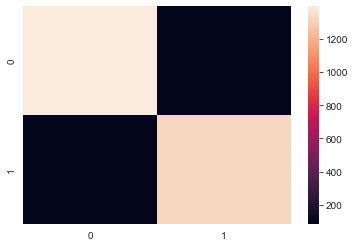

In [48]:
sns.heatmap(confusion_mat)

In [50]:
import joblib

In [51]:
joblib.dump(NN, 'neural_net.joblib')

['neural_net.joblib']

In [52]:
import pickle

In [53]:
pickle.dump(NN, open('neural_net.pickle', 'wb'))